In [1]:
 pip install tensorflow==2.15.0

  Using cached protobuf-4.25.6-cp310-abi3-win_amd64.whl.metadata (541 bytes)
Using cached protobuf-4.25.6-cp310-abi3-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn==1.3.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy==1.24.3

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib==3.7.2

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn==0.13.0

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas==2.1.0

In [7]:
pip install streamlit==1.31.1

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install librosa==0.10.1

  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:

cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 4804s 2s/step - loss: 1.3945 - accuracy: 0.5889 - val_loss: 0.5325 - val_accuracy: 0.8363
Epoch 2/10
2197/2197 [==============================] - 5645s 3s/step - loss: 0.4560 - accuracy: 0.8556 - val_loss: 0.3348 - val_accuracy: 0.8931
Epoch 3/10
2197/2197 [==============================] - 4265s 2s/step - loss: 0.2750 - accuracy: 0.9112 - val_loss: 0.2173 - val_accuracy: 0.9305
Epoch 4/10
2197/2197 [==============================] - 4332s 2s/step - loss: 0.1913 - accuracy: 0.9384 - val_loss: 0.2367 - val_accuracy: 0.9236
Epoch 5/10
2197/2197 [==============================] - 10178s 5s/step - loss: 0.1465 - accuracy: 0.9516 - val_loss: 0.1872 - val_accuracy: 0.9388
Epoch 6/10
2197/2197 [==============================] - 4326s 2s/step - loss: 0.1098 - accuracy: 0.9643 - val_loss: 0.1784 - val_accuracy: 0.9452
Epoch 7/10
2197/2197 [==============================] - 4209s 2s/step - loss: 0.0907 - accuracy: 0.9708 - val_loss: 0.105

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 1091s 496ms/step - loss: 0.0313 - accuracy: 0.9901
Training accuracy: 0.9900988936424255


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 303s 549ms/step - loss: 0.1166 - accuracy: 0.9640
Validation accuracy: 0.9639768004417419


In [20]:
cnn.save('trained_plant_disease_model.keras')

In [3]:
from tensorflow.keras.models import load_model

model_path = r"C:\Users\Admin\OneDrive\Desktop\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\trained_plant_disease_model.keras"

model = load_model(model_path)


In [21]:
training_history.history #Return Dictionary of history

{'loss': [1.394492745399475,
  0.45596274733543396,
  0.2750294804573059,
  0.1912856251001358,
  0.1465258002281189,
  0.1098451241850853,
  0.09065848588943481,
  0.0715605840086937,
  0.0630209743976593,
  0.05978824198246002],
 'accuracy': [0.5889039039611816,
  0.8555516004562378,
  0.9112454652786255,
  0.9383739829063416,
  0.951646625995636,
  0.9642506837844849,
  0.9707518219947815,
  0.9764279127120972,
  0.979173481464386,
  0.9803400039672852],
 'val_loss': [0.5324671864509583,
  0.33479171991348267,
  0.217283234000206,
  0.23665101826190948,
  0.18724294006824493,
  0.178446963429451,
  0.10523825883865356,
  0.12634049355983734,
  0.14581196010112762,
  0.11662670969963074],
 'val_accuracy': [0.8362736105918884,
  0.8930684924125671,
  0.9305144548416138,
  0.9236285090446472,
  0.9388231039047241,
  0.9451969265937805,
  0.9652856588363647,
  0.9601069688796997,
  0.9556680917739868,
  0.9639768004417419]}

In [22]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


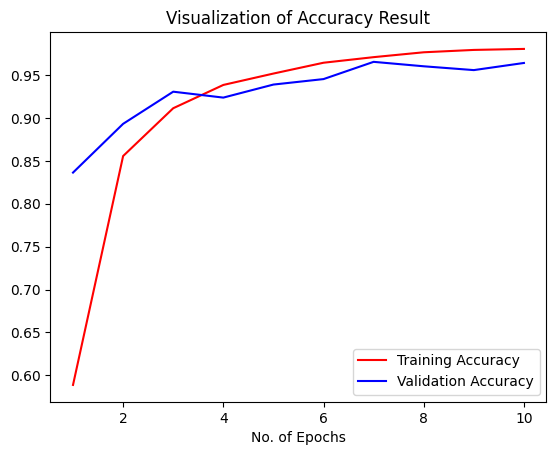

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 617s 35ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.95      1.00      0.97       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.97      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.92      0.92       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.93      0.

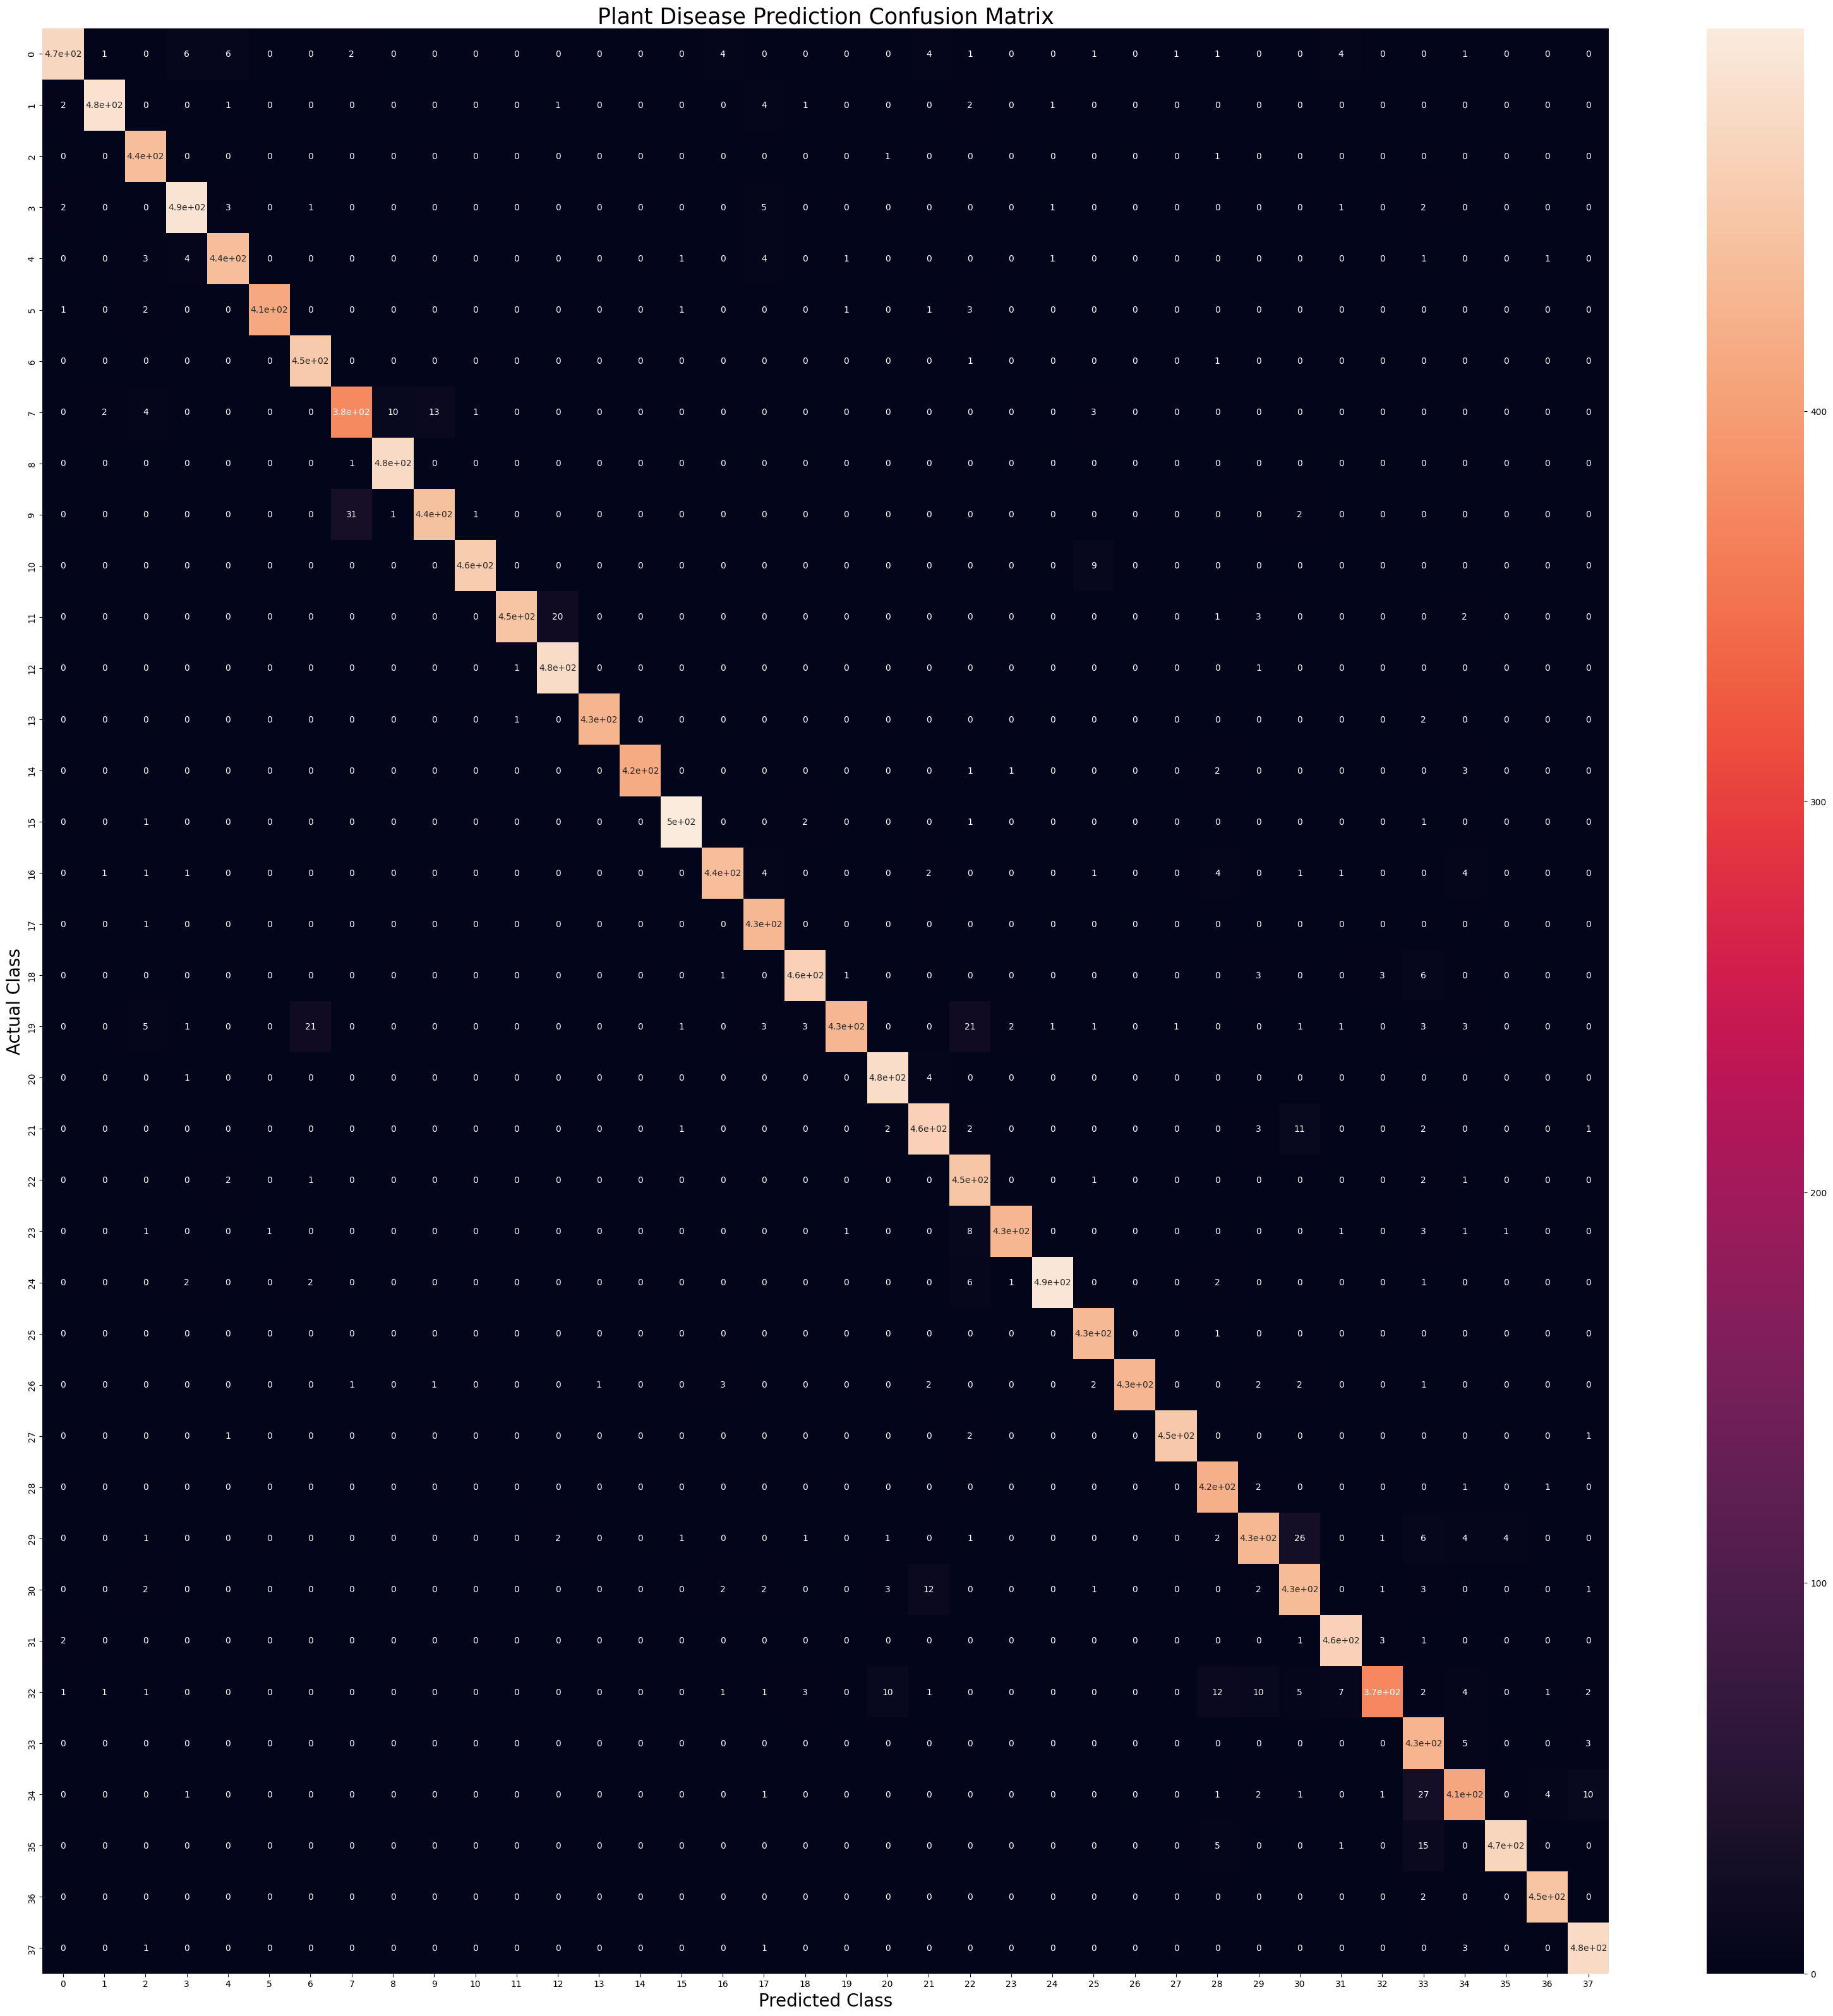

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()